In [1]:
import torch
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(cv.__version__)
print(torch.__version__)


1.3.5
1.21.6
4.6.0
1.12.1+cu113


In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
# create data
start = 0
end = 100
step = 0.2

#weight and bias for linear regression equation y = weight * X + bias

weight = 0.7
bias = 0.3

#Write the equation 

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias




In [4]:
# Split data
train_split = int(0.8*len(X))
Xtrain, ytrain = X[:train_split], y[:train_split] 
Xtest, ytest = X[train_split:], y[train_split:]

len(Xtrain), len(ytrain), len(Xtest), len(ytest)

(400, 400, 100, 100)

In [8]:
def plot_predictions(          train_data = Xtrain,
                     train_labels = ytrain,
                     test_data = Xtest,
                     test_labels = ytest,
                     predictions =None):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c ="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="r", s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c ="y", s=4, label="Predictions")
  plt.legend(prop={"size":14})

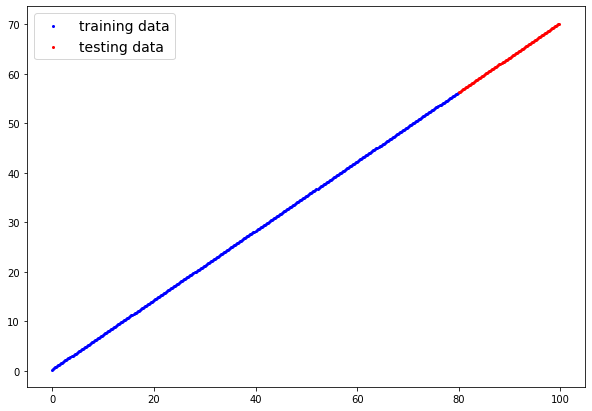

In [9]:
plot_predictions(Xtrain, ytrain, Xtest, ytest)

In [10]:
from torch import nn
class LRM(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))
  
  def forward(self, x:torch.Tensor):
    return self.weights *x + self.bias

In [11]:
torch.manual_seed(42)

models = LRM()


In [12]:
models.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
with torch.inference_mode():
  y_preds = models(Xtest)
  

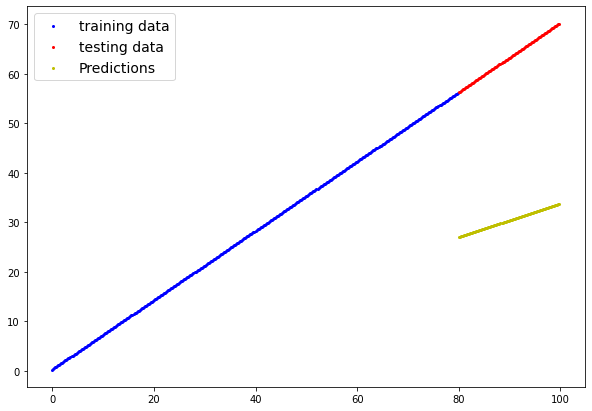

In [14]:
plot_predictions(predictions=y_preds)

In [18]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=models.parameters(),lr=0.01)

In [29]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  models.train()

  y_pred = models(Xtrain)
  loss = loss_fn(y_pred, ytrain)
  optim.zero_grad()

  loss.backward()

  optim.step()

  models.eval()
  with torch.inference_mode():
    test_pred = models(Xtest)
    test_loss = loss_fn(test_pred, ytest.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 13.019062042236328 | MAE Test Loss: 6.720527172088623 
Epoch: 10 | MAE Train Loss: 12.944999694824219 | MAE Test Loss: 6.884575843811035 
Epoch: 20 | MAE Train Loss: 12.880664825439453 | MAE Test Loss: 7.026900768280029 
Epoch: 30 | MAE Train Loss: 12.822813987731934 | MAE Test Loss: 7.154743194580078 
Epoch: 40 | MAE Train Loss: 12.764961242675781 | MAE Test Loss: 7.282592296600342 
Epoch: 50 | MAE Train Loss: 12.707108497619629 | MAE Test Loss: 7.410434722900391 
Epoch: 60 | MAE Train Loss: 12.657783508300781 | MAE Test Loss: 7.519252300262451 
Epoch: 70 | MAE Train Loss: 12.61413860321045 | MAE Test Loss: 7.615395545959473 
Epoch: 80 | MAE Train Loss: 12.5704984664917 | MAE Test Loss: 7.7115325927734375 
Epoch: 90 | MAE Train Loss: 12.52685546875 | MAE Test Loss: 7.807668685913086 


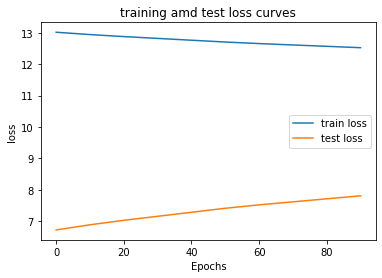

In [30]:
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("training amd test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();

In [32]:
models.eval()

with torch.inference_mode():
  y_preds = models(Xtest)

y_preds


tensor([[31.3913],
        [31.4694],
        [31.5474],
        [31.6254],
        [31.7035],
        [31.7815],
        [31.8595],
        [31.9375],
        [32.0156],
        [32.0936],
        [32.1716],
        [32.2496],
        [32.3277],
        [32.4057],
        [32.4837],
        [32.5618],
        [32.6398],
        [32.7178],
        [32.7958],
        [32.8739],
        [32.9519],
        [33.0299],
        [33.1079],
        [33.1860],
        [33.2640],
        [33.3420],
        [33.4201],
        [33.4981],
        [33.5761],
        [33.6541],
        [33.7322],
        [33.8102],
        [33.8882],
        [33.9663],
        [34.0443],
        [34.1223],
        [34.2003],
        [34.2784],
        [34.3564],
        [34.4344],
        [34.5124],
        [34.5905],
        [34.6685],
        [34.7465],
        [34.8246],
        [34.9026],
        [34.9806],
        [35.0586],
        [35.1367],
        [35.2147],
        [35.2927],
        [35.3708],
        [35.

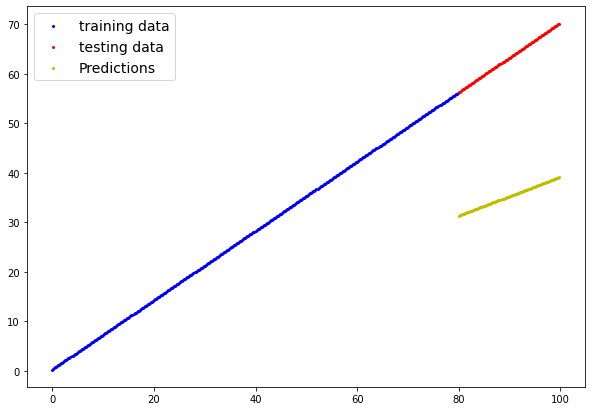

In [33]:
plot_predictions(predictions=y_preds)

In [34]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=models.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [35]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1063 Oct 25 12:06 models/01_pytorch_workflow_model_0.pth


In [36]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_models1 = LRM()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_models1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [39]:

# 1. Put the loaded model into evaluation mode
loaded_models1.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_models1(Xtest)

In [40]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        